# 03. Convolutional Neural Networks and Computer Vision with TensorFlow

So far we've covered the basics of TensorFlow and built a handful of models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network) can be used for computer vision (detecting patterns in visual data).

> 🔑 Note: In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:

- Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
- Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)

In this notebook, we're going to follow the TensorFlow modeling workflow we've been following so far while learning about how to build and use CNNs.

## What we're going to cover

Specifically, we're going to go through the following with TensorFlow:

- Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example (what we're working towards)
- Steps in modeling for binary image classification with CNNs
    - Becoming one with the data
    - Preparing data for modeling
    - Creating a CNN model (starting with a baseline)
    - Fitting a model (getting it to find patterns in our data)
    - Evaluating a model
    - Improving a model
    - Making a prediction with a trained model
- Steps in modelling for multi-class image classification with CNNs
- Same as above (but this time with a different dataset)

## How you can use this notebook

You can read through the descriptions and the code (it should all run, except for the cells that error on purpose), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, and why it breaks.

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-11-06 03:06:04.446989


## Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩, and build a binary classifier.

> 🔑 Note: To prepare the data we're using, preprocessing steps such as moving the images into different subset folders, have been done. To see these preprocessing steps check out [the preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

We'll download the `pizza_steak` subset .zip file and unzip it.

In [2]:
import zipfile

# Download the zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-06 03:08:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   130MB/s    in 0.8s    

2023-11-06 03:08:06 (130 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



> 🔑 Note: If you're using Google Colab and your runtime disconnects, you may have to redownload the files. You can do this by rerunning the cell above.

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

With this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:

- A `train` directory that contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
- A `test` directory with the same structure as the `train` directory.

```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
```

Let's inspect each of the directories we've downloaded.

To so do, we can use the command `ls` which stands for list.

In [3]:
!ls pizza_steak

test  train


We can see we've got a `train` and `test` folder.

Let's see what's inside one of them.

In [4]:
!ls pizza_steak/train/

pizza  steak


And how about insde the `steak` directory?

In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

Woah, a whole bunch of images. But how many?

> 🛠 Practice: Try listing the same information for the pizza directory in the test folder.

In [6]:
# Practice
!ls pizza_steak/test/pizza/

1001116.jpg  1459760.jpg  2082495.jpg  254812.jpg   328965.jpg	 3785667.jpg  625434.jpg
1032754.jpg  1475479.jpg  2101820.jpg  2549661.jpg  3296507.jpg  3793004.jpg  645087.jpg
103708.jpg   1484836.jpg  2111981.jpg  2572488.jpg  3296907.jpg  380739.jpg   648055.jpg
1060407.jpg  148765.jpg   2124579.jpg  2582289.jpg  3316410.jpg  3814200.jpg  65128.jpg
106507.jpg   1503858.jpg  212995.jpg   2583389.jpg  331644.jpg	 3827990.jpg  666569.jpg
1067986.jpg  1506213.jpg  2157510.jpg  2605853.jpg  335474.jpg	 3898047.jpg  678708.jpg
1106738.jpg  1507019.jpg  2161321.jpg  2615100.jpg  3375083.jpg  3913440.jpg  714866.jpg
1119571.jpg  1512557.jpg  2165223.jpg  2619955.jpg  3376617.jpg  3919151.jpg  723745.jpg
11297.jpg    153195.jpg   2195935.jpg  2631321.jpg  3385460.jpg  395662.jpg   724290.jpg
1152100.jpg  1555015.jpg  2203687.jpg  2719697.jpg  3392194.jpg  397910.jpg   728260.jpg
1179703.jpg  1594097.jpg  2218680.jpg  2782998.jpg  341377.jpg	 398345.jpg   729262.jpg
1180001.jpg  1618659.jpg  

In [8]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [9]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [10]:
# Get the class names (programmatically, this is much more helpfule with a longer list of classes)
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")                               # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

> 🤔 Note: Whenever you're working with data, it's always good to visualize it as much as possible. Treat your first couple of steps of a project as becoming one with the data. Visualize, visualize, visualize.

In [11]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (364, 512, 3)


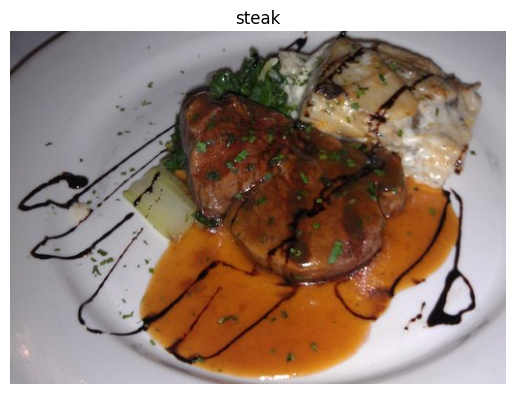

In [12]:
# View the random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

After going through a dozen or so images from the different classes, you can start to get an idea of what we're working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

You might've noticed we've been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).

In [13]:
# View the img (actually just a big array/tensor)
img

array([[[ 70,  67,  76],
        [ 70,  67,  76],
        [ 71,  68,  77],
        ...,
        [135, 134, 142],
        [135, 134, 142],
        [135, 134, 142]],

       [[ 76,  73,  82],
        [ 75,  72,  81],
        [ 76,  73,  82],
        ...,
        [135, 134, 142],
        [135, 134, 142],
        [134, 133, 141]],

       [[ 77,  74,  83],
        [ 76,  73,  82],
        [ 76,  73,  82],
        ...,
        [136, 135, 143],
        [135, 134, 142],
        [134, 133, 141]],

       ...,

       [[151, 152, 157],
        [154, 155, 160],
        [155, 156, 161],
        ...,
        [216, 212, 226],
        [215, 211, 225],
        [212, 208, 222]],

       [[152, 153, 158],
        [155, 156, 161],
        [156, 157, 162],
        ...,
        [217, 213, 227],
        [216, 212, 226],
        [213, 209, 223]],

       [[153, 154, 159],
        [155, 156, 161],
        [157, 158, 163],
        ...,
        [215, 211, 225],
        [214, 210, 224],
        [211, 207, 221]]

In [14]:
# View the image shape
img.shape # returns (width, height, color channels)

(364, 512, 3)

Looking at the image shape more closely, you'll see it's in the form `(Width, Height, Color Channels)`.

In our case, the width and height vary but because we're dealing with color images, the color channels value is always 3. This is for different values of red, green, and blue (RGB) pixels.

You'll notice all of the values in the `img` array are between 0 and 255. This is because that's the possible range for red, green, and blue values.

For example, a pixel with a value `red=0, green=0, blue=255` will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

> 🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [15]:
# Get all the pixel values between 0 & 1
img / 255.

array([[[0.2745098 , 0.2627451 , 0.29803922],
        [0.2745098 , 0.2627451 , 0.29803922],
        [0.27843137, 0.26666667, 0.30196078],
        ...,
        [0.52941176, 0.5254902 , 0.55686275],
        [0.52941176, 0.5254902 , 0.55686275],
        [0.52941176, 0.5254902 , 0.55686275]],

       [[0.29803922, 0.28627451, 0.32156863],
        [0.29411765, 0.28235294, 0.31764706],
        [0.29803922, 0.28627451, 0.32156863],
        ...,
        [0.52941176, 0.5254902 , 0.55686275],
        [0.52941176, 0.5254902 , 0.55686275],
        [0.5254902 , 0.52156863, 0.55294118]],

       [[0.30196078, 0.29019608, 0.3254902 ],
        [0.29803922, 0.28627451, 0.32156863],
        [0.29803922, 0.28627451, 0.32156863],
        ...,
        [0.53333333, 0.52941176, 0.56078431],
        [0.52941176, 0.5254902 , 0.55686275],
        [0.5254902 , 0.52156863, 0.55294118]],

       ...,

       [[0.59215686, 0.59607843, 0.61568627],
        [0.60392157, 0.60784314, 0.62745098],
        [0.60784314, 0

## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different from other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

|**Hyperparameter/<br>Layer type**|**What does it do?**|**Typical values**|
|--|--|--|
|Input image(s)|	Target images you'd like to discover patterns in|Whatever you can take a photo (or video) of|
|Input layer|Takes in target images and preprocesses them<br>for further layers	|`input_shape = [batch_size, image_height, image_width, color_channels]`|
|Convolution layer|	Extracts/learns the most important features<br>from target images|	Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)<br>(X can be multiple values)|
|Hidden activation|	Adds non-linearity to learned features<br>(non-straight lines)|	Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu))|
|Pooling layer|	Reduces the dimensionality of<br>learned image features|	Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or<br>Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))|
|Fully connected layer|	Further refines learned features from<br>convolution layers|[`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)|
|Output layer|Takes learned features and outputs them<br>in shape of target labels|`output_shape = [number_of_classes]`<br>(e.g. 3 for pizza, steak, or sushi)|
|Output activation|	Adds non-linearities to output layer|[`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or<br>[`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)

How they stack together:

![image0](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

## An end-to-end example

We've checked out our data and found there are 750 training images, as well as 250 test images per class and they're all of various shapes.

It's time to jump straight into the deep end.

Reading the [original dataset authors' paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a [Random Forest machine learning model](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) and averaged 50.76% accuracy in predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

> 🔑 Note: A baseline is a score or evaluation metric you want to try and beat. Usually, you'll start with a simple model, create a baseline, and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modeling paper with a published result and try to beat it.

The code in the following cell replicates and end-to-end way to model our `pizza_steak` dataset with a convolutional neural network (CNN) using the components listed above.

There will be a bunch of things you might not recognize but step through the code yourself and see if you can figure out what it's doing.

We'll go through each of the steps later on in the notebook.

For reference, the model we're using replicates TinyVGG, the computer vision architecture that fuels the [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/).

📖 Resource: The architecture we're using below is a scaled-down version of [VGG-16](https://arxiv.org/abs/1505.06798), a convolutional neural network that came 2nd in the 2014 [ImageNet classification competition](http://image-net.org/).

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1. / 255.)
valid_datagen = ImageDataGenerator(rescale = 1. / 255.)

# Setup the train and test directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,           # number of images to process at a time
                                               target_size=(224, 224),  # convert all images to be 224 x 224
                                               class_mode="binary",     # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,               # can also be (3, 3)
                           activation='relu',
                           input_shape=(224, 224, 3)),  # first layer specifies input shape (height, width, color channels)
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,              # pool_size can also be (2, 2)
                              padding='valid'),         # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),   # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2,),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')      # binary activation output
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 116s 2s/step - loss: 0.5863 - accuracy: 0.6833 - val_loss: 0.5049 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 100s 2s/step - loss: 0.4480 - accuracy: 0.7933 - val_loss: 0.3958 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 124s 3s/step - loss: 0.4341 - accuracy: 0.8160 - val_loss: 0.4186 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 130s 3s/step - loss: 0.3695 - accuracy: 0.8487 - val_loss: 0.3569 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 149s 3s/step - loss: 0.3286 - accuracy: 0.8740 - val_loss: 0.3685 - val_accuracy: 0.8660


> 🤔 Note: If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and selecting "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.

Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~85% accuracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classification problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

> 🛠 Practice: Step through each of the main blocks of code in the cell above, what do you think each is doing? It's okay if you're not sure, we'll go through this soon. In the meantime, spend 10 minutes playing around the incredible [CNN explainer website](https://poloclub.github.io/cnn-explainer/). What do you notice about the layer names at the top of the webpage?

Since we've already fit a model, let's check out its architecture.

In [18]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

What do you notice about the names of `model_1`'s layers and the layer names at the top of the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)?

I'll let you in on a little secret: we've replicated the exact architecture they use for their model demo.

Look at you go! You're already starting to replicate models you find in the wild.

Now there are a few new things here we haven't discussed, namely:

- The [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class and the `rescale` parameter
- The [`flow_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method
    - The `batch_size` parameter
    - The `target_size` parameter
- [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers (and the parameters that come with them)
- [`MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers (and their parameters).
- The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function

Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.

## Using the same model as before

To exemplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

> 🔑 Note: If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the simple 4-layer architecture used to separate dots replicated from the [TensorFlow Playground environment](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

We can use all of the same parameters in our previous model except for changing two things:

- The data - we're now working with images instead of dots.
- The input shape - we have to tell our neural network the shape of the images we're working with.
    - A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, and blue color channels.

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,                 # use the same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use the same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 178ms/step - loss: 0.9838 - accuracy: 0.5940 - val_loss: 0.5680 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 7s 154ms/step - loss: 0.5466 - accuracy: 0.7433 - val_loss: 0.5037 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 7s 155ms/step - loss: 0.5038 - accuracy: 0.7640 - val_loss: 0.4765 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 8s 163ms/step - loss: 0.4851 - accuracy: 0.7693 - val_loss: 0.4567 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 12s 268ms/step - loss: 0.4631 - accuracy: 0.7900 - val_loss: 0.4468 - val_accuracy: 0.7960


Hmmm... our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Let's see the architecture.

In [24]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 4)                 602116    
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Wow. One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters whereas `model_1` has only 31,101. And despite this difference, `model_1` still far and large outperforms `model_2`.

🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have several learnable parameters connected and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are fewer learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different features in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

> 🔑 Note: Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of your model.

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_2 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
    tf.keras.layers.Dense(100, activation='relu'),      # increase number of neurons from 4 to 100 (for each layer)
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),      # add an extra layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 24s 485ms/step - loss: 3.3892 - accuracy: 0.6093 - val_loss: 1.4596 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 22s 472ms/step - loss: 0.9152 - accuracy: 0.7107 - val_loss: 0.7212 - val_accuracy: 0.6860
Epoch 3/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5824 - accuracy: 0.7440 - val_loss: 0.5498 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 25s 516ms/step - loss: 0.7602 - accuracy: 0.7240 - val_loss: 0.6982 - val_accuracy: 0.7000
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5895 - accuracy: 0.7673 - val_loss: 0.5418 - val_accuracy: 0.7840


Woah! Looks like our model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set.

How does the architecture look?

In [26]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 100)               15052900  
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


My gosh, the number of trainable parameters has increased even more than `model_2`. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, `model_3` still doesn't outperform `model_1`.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using fewer parameters.

## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Import and become one with the data

Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your mental model of the data.

In our case, we might notice that the steak images tend to have darker colors whereas pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You can also notice if some of your data is messed up (for example, has the wrong label) and start to consider ways you might go about fixing it.

> 📖 Resource: To see how this data was processed into the file format we're using, see the [preprocessing notebook].

If the visualization cell below doesn't work, make sure you've got the data by uncommenting the cell below.

In [27]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (512, 512, 3)
Image shape: (512, 507, 3)


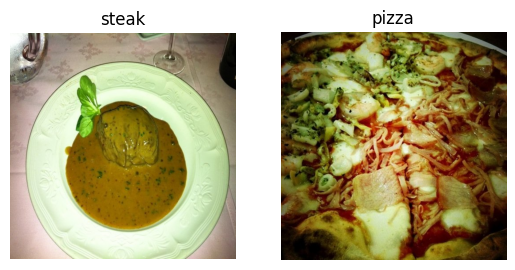

In [28]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data separated into `train` and `test` directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [29]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

- 10,000 images (or more) might not fit into the memory of your processor (GPU).
- Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20).

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.

In [30]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 255.)
test_datagen = ImageDataGenerator(rescale = 1. / 255.)

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the `rescale` parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The `rescale` parameter, along with `1. / 255.` is like saying "divide all of the pixel values by 255". This results in all of the images being imported and their pixel values being normalized (converted to be between 0 and 1).

> 🔑 Note: For more transformation options such as data augmentation (we'll see this later), refer to the [`ImageDataGenerator` documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

Now we've got a couple of `ImageDataGenerator` instances, where we can load our images from their respective directories using the [`flow_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method.

In [31]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

- Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
- The `target_size` parameter defines the input size of our images in `(height, width)` format.
- The `class_mode` value of `'binary'` defines our classification problem type. If we had more than two classes, we would use `'categorical'`.
- The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the `train_data` object.

In [32]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

Wonderful, it seems our images and labels are in batches of 32.

Let's see what the images look like.

In [33]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

Due to our `rescale` parameter, the images are now in `(224, 224, 3)` shape tensors with values between 0 and 1.

How about the labels?

In [34]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Due to the `class_mode` parameter being `'binary'` our labels are either `0` (pizza) or `1` (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.